#### Objective

Find the path connecting all points in a 2D binary image.

In [1]:
import numpy as np
import scipy as sp
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk, closing, medial_axis, convex_hull_image
from skimage.feature import peak_local_max

%matplotlib inline

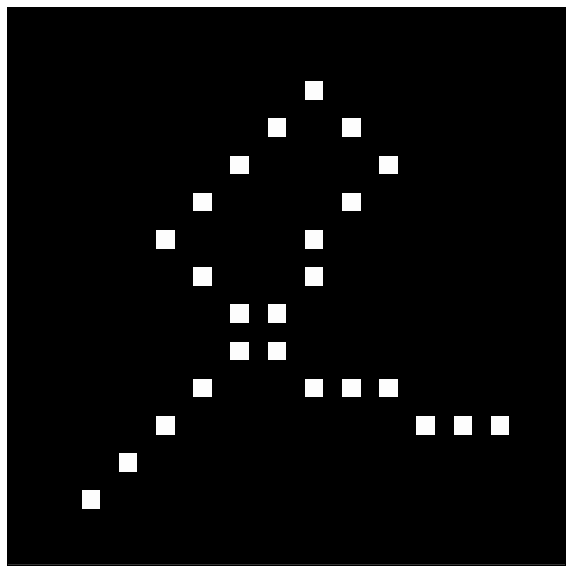

In [2]:
# import some points
# stored at: https://github.com/mycarta/rainbowbot/blob/master/stuff4path_finding/loop.txt
points = np.loadtxt('loop.txt', delimiter=",")

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(points, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

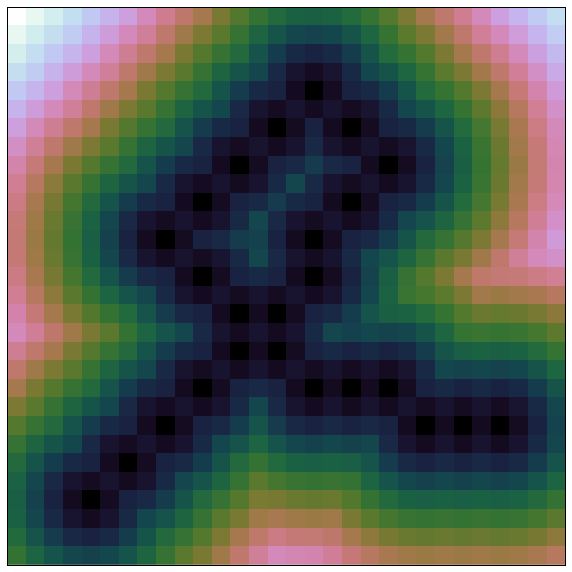

In [3]:
# distance transform
dstnc = sp.ndimage.distance_transform_edt(1-points)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(dstnc, cmap='cubehelix',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

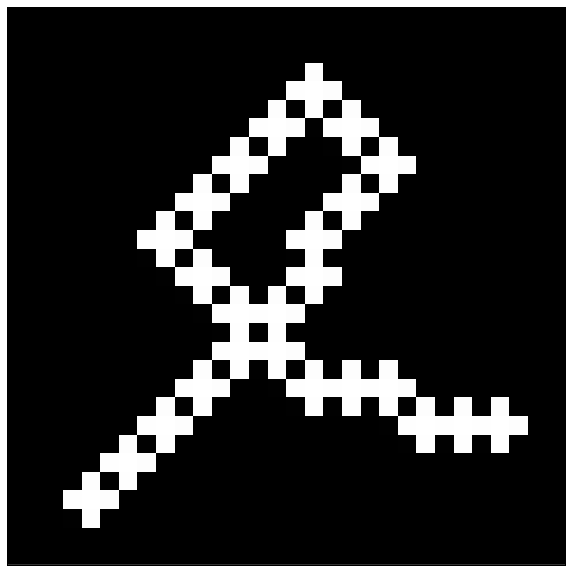

In [4]:
# find the local minima
local_min = peak_local_max(1-dstnc, indices=False, footprint=np.ones((3, 3)), labels=1-points)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(local_min, cmap='cubehelix',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

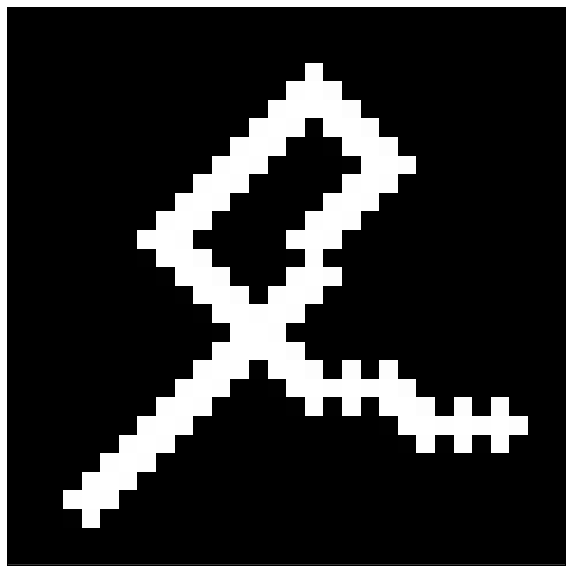

In [5]:
# fill small holes

filled = closing(local_min)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(filled, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

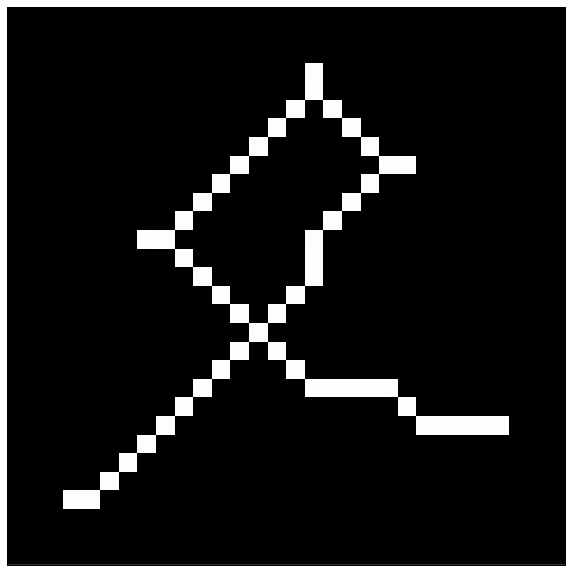

In [6]:
# skeletonize to get path
skel = medial_axis(filled)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(skel, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

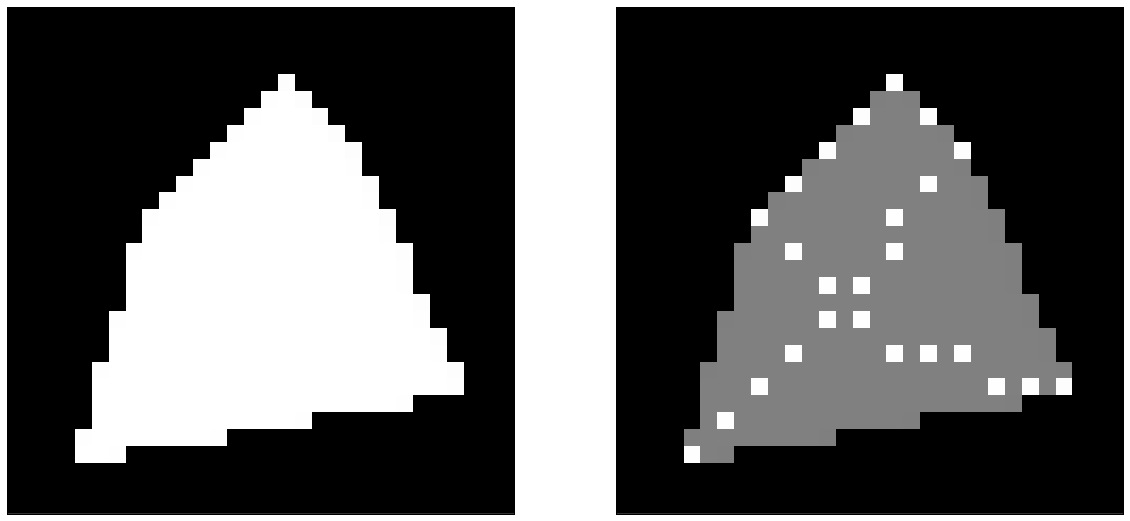

In [10]:
# find convex hull
chull = convex_hull_image(points)
points_chull = np.copy(points)
points_chull[chull] += 1

# plot
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
plt.imshow(chull, cmap='gray',interpolation= 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(points_chull, cmap='gray',interpolation= 'none')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()


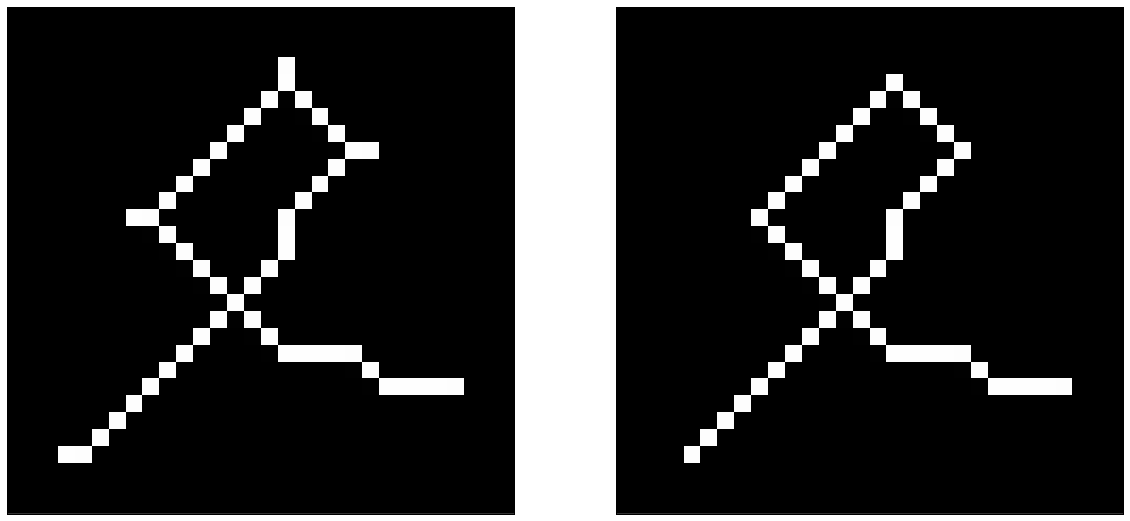

In [11]:
# constrain path with convex hull
path = skel * chull

# plot
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
plt.imshow(skel, cmap='gray',interpolation= 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(path, cmap='gray',interpolation= 'none')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()
